# Kth biggest of subarray mean 

## Description:

Let $N, K$ be two positive integers with $K \leq N$. 
Let $A$ be an array of length $N$. 
Order the means of all subarrays of $A$ in descending order and find its $k$-th ($1$-based) element.

## Example:
```
sample input:
3 3
1 2 3

sample output:
2
```
## Scale and requirements:

 > $1 \leq N \leq 2\cdot10^5$

 - time limit: $2$ seconds;
 - memory limit: $256$mb
 
### Notes:
1. from https://www.1point3acres.com/bbs/thread-717719-1-1.html;
![title](SubarrayMeanKthBiggest_reference.png)

## Solution
From now on, we use $0$-based ordering.
Let $S[i] = \sum_{j = 0}^{j = i - 1}A[i]$, $i = 0, \dots N$, then we have the summation from the $a$-th entry to $b-1$-th, $b > a$ entry can be written as $S[b] - S[a]$ and the mean is 
$\frac{S[b] - S[a]}{b - a}$.
Let $t$ be the value we guess to be the $k$-th entry ($1$-based) in the descending ordering of the means, if the guess is correct, then there must be at most $k - 1$ means that is strict bigger than $t$ and at least $k$ means that is bigger than or equal to $t$. 
Using the expression of mean above, we get the criterion is equivalent to having at most $k - 1$ pairs of indices $a$ and $b$ such that $S[b] - bt > S[a] - at$ and at least $k$ pairs $a$ and $b$ such that $S[b] - bt \geq S[a] - at$. 

Let $B$ be the array defined by $B_t[i] = S[i] - it$, $i = 0, \dots, N$, the problem becomes determining whether there are at most $k - 1$ pairs of indices $i < j$ such that $B_t[i] < B_t[j]$ and at least $k$ pairs with $B_t[i] \leq B_t[j]$.

In [65]:
import random 
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [64]:
def getKth(arr, k):
    lo, hi = min(arr), max(arr) + 1
    while hi > lo:
        m = (lo + hi) // 2
        
        b = sum([a > m for a in arr]) 
        e = sum([a == m for a in arr])
        
        if b < k and b + e >= k:
            return m
        elif b >= k:
            lo = m + 1
        else:
            hi = m
    return lo

In [78]:
def merge(arr):
    if len(arr) < 2:
        return arr, 0, 0
    
    N = len(arr)
    N_l, N_r = N // 2, (N + 1) // 2
    arr_l, b_l, e_l = merge(arr[:N_l])
    arr_r, b_r, e_r = merge(arr[N_l:])
    
    # Merge
    b, e, i, j = 0, 0, 0, 0
    arr_merged = []
    while i < N_l and j < N_r:
        l, r = arr_l[i], arr_r[j]
        if l < r:
            arr_merged.append(l)
            b += N_r - j
            i += 1
        elif l == r:
            u, v = i, j
            while u < N_l and arr_l[u] == l:
                u += 1
            while v < N_r and arr_r[v] == l:
                v += 1
            e += (u - i) * (v - j)
            b += (u - i) * (N_r - v)
            arr_merged += [l] * (u - i + v - j)
            i, j = u, v
        else:
            arr_merged.append(r)
            j += 1
    if i < N_l:
        arr_merged += arr_l[i: ]
    if j < N_r:
        arr_merged += arr_r[j: ]

    return arr_merged, b_l + b_r + b, e_l + e_r + e


def getKth(arr, k):
    
    prefixSum = [0]
    for a in arr:
        prefixSum.append(prefixSum[-1] + a)
    
    
    lo, hi = min(arr), max(arr) + 1
    while hi > lo:
        m = (lo + hi) // 2
        
        _, b, e = merge([ps - i * m for i, ps in enumerate(prefixSum)])
        
        if b < k and b + e >= k:
            return m
        elif b >= k:
            lo = m + 1
        else:
            hi = m
    return lo


def bruteForce(arr, k):
    means = arr.copy()
    memo = arr.copy()
    for n in range(1, len(arr)):
        memo = [m + arr[i + n] for i, m in enumerate(memo[:-1])]
        meams += [m / (n + 1)]
        

## Runtime comparison with brute-force solution

In [ ]:
def bruteForce(arr):
    b, e = 0, 0
    for i in range(len(arr)):
        for j in range(i + 1, len(arr)):
            if arr[i] < arr[j]:
                b += 1
            elif arr[i] == arr[j]:
                e += 1
    return b, e

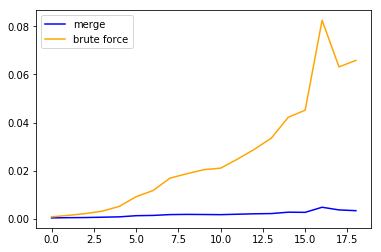

In [77]:
num_reruns = 50

TE, TBF = [], []
for N in range(100, 1050, 50):
    # print(N)
    te, tbf = [], []
    for _ in range(num_reruns):
        arr = [random.randint(1, N) for _ in range(N)]

        time0 = time()
        arr_sorted, b, e = merge(arr)
        time1 = time()
        te.append(time1 - time0)

        time0 = time()
        b_bf, e_bf = bruteForce(arr)
        time1 = time()
        tbf.append(time1 - time0)

        if b != b_bf or e != e_bf:
            print(arr)

    ae, abf = np.mean(te), np.mean(tbf)
    # print(f'\tmerge: {ae:.6f}, brute force: {abf:.6f}')
    TE.append(ae)
    TBF.append(abf)

plt.plot(TE, color='blue', label='merge')
plt.plot(TBF, color='orange', label='brute force')
plt.legend()
plt.show()